# MNIST Classification
- 0 ~ 9의 숫자 데이터 셋
- 28 * 28 픽셀의 이미지 데이터
- 0 ~ 255의 픽셀 값
- 60,000개의 트레이닝 데이터
  - 55,000개의 트레이닝 데이터
  - 5,000개의 검증 데이터
- 10,000개의 테스트 데이터
- 10개의 클래스 (0 ~ 9)
- 10개의 클래스에 대한 확률값의 합은 1
- 확률값이 가장 큰 클래스가 예측한 클래스 (argmax)
- 10개의 클래스에 대한 확률값을 출력하는 신경망을 만들어 보자

### 참고 웹사이트

- [MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)
- [신경망 모델 구성하기](https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html)
- [Sequential 모델](https://www.tensorflow.org/guide/keras/overview?hl=ko)
- [소프트맥스 회귀로 MNIST 데이터 분류하기](https://wikidocs.net/60324)

### 1. 데이터 준비
- MNIST 데이터 셋을 다운로드 받아서 준비한다.
- 데이터 셋 다운로드 방법
  1. `keras.datasets.mnist.load_data()` 함수를 사용한다.
  2. `torchvision.datasets.MNIST` 클래스를 사용한다.
  3. `tensorflow.keras.datasets.mnist.load_data()` 함수를 사용한다.
  4. `sklearn.datasets.fetch_openml()` 함수를 사용한다.
  5. 원본을 직접 다운로드 받아서 사용한다. ([yann.lecun](http://yann.lecun.com/exdb/mnist/))
       - 로그인 요구시 http로 접속 ([twitter](https://twitter.com/ylecun/status/1628746102827630593))
  6. 다른 사람이 준비한 데이터 셋을 사용한다. ([openml.org](https://www.openml.org/d/554))

#### Shell commands to install pytorch and torchvision

##### GPU version
```shell
conda install pytorch torchvision pytorch-cuda=11.8 matplotlib ipykernel -c pytorch -c nvidia
```

##### CPU version
```shell
conda install pytorch torchvision cpuonly matplotlib ipykernel -c pytorch
```

In [1]:
import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random


print("PyTorch version:[%s]." % (torch.__version__))
print("torchvision version:[%s]." % (torchvision.__version__))
print("GPU 사용 가능 여부: {}".format(torch.cuda.is_available()))
#print("GPU 이름: {}".format(torch.cuda.get_device_name(0)))
print("GPU 개수: {}".format(torch.cuda.device_count()))
print("CUDA 버전: {}".format(torch.version.cuda))


USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

PyTorch version:[2.2.2].
torchvision version:[0.17.2].
GPU 사용 가능 여부: False
GPU 개수: 0
CUDA 버전: None
다음 기기로 학습합니다: cpu


In [2]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# hyperparameters
training_epochs = 10
batch_size = 100

learning_rate = 0.1

input_size = 784    # 28x28 image       # 고정된 값 (이미지 크기)
hidden_size = 100   # 임의의 값           # 임의의 값 (hidden layer의 노드 개수)
output_size = 10    # 0~9               # 고정된 값 (분류할 클래스 개수)


In [4]:
# MNIST dataset

# 코드 실행 시 MNIST_data 폴더에 MNIST 데이터셋이 없다면 다운로드됨

# .gz 파일은 압축된 파일 (다운로드 시 자동으로 압축 해제됨)
# t10k-images-idx3-ubyte.gz: 0~9까지의 숫자 이미지 10,000개
# t10k-labels-idx1-ubyte.gz: 0~9까지의 숫자 이미지에 대한 정답 레이블 10,000개
# train-images-idx3-ubyte.gz: 0~9까지의 숫자 이미지 60,000개
# train-labels-idx1-ubyte.gz: 0~9까지의 숫자 이미지에 대한 정답 레이블 60,000개

# train=True: 학습 데이터를 리턴
# train=False: 테스트 데이터를 리턴
# download=True: MNIST 데이터셋이 없는 경우 인터넷에서 다운로드
# root: MNIST 데이터가 저장될 경로
# transform: 이미지와 레이블에 적용할 변형

mnist_train = dsets.MNIST(
    root="MNIST_data/",
    train=True,
    transform=transforms.ToTensor(),
    download=True,
)

mnist_test = dsets.MNIST(
    root="MNIST_data/",
    train=False,
    transform=transforms.ToTensor(),
    download=True,
)

In [5]:
# dataset loader
data_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,  # 배치 크기는 100
)

X: torch.Size([100, 1, 28, 28]) type: torch.FloatTensor
Y: torch.Size([100]) type: torch.LongTensor


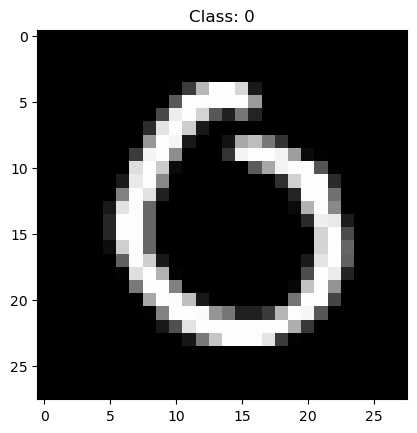

In [6]:
# Print sample data
# 첫번째 미니배치의 첫번째 이미지 데이터를 불러옴
# shape: [배치크기, 채널, 높이, 너비]
# 채널: 1은 흑백, 3은 RGB
for X, Y in data_loader:
    print('X:', X.size(), 'type:', X.type())
    print('Y:', Y.size(), 'type:', Y.type())

    plt.imshow(X[0, 0, :, :].numpy(), cmap='gray')
    plt.title('Class: ' + str(Y[0].item()))
    plt.show()

    break


In [19]:
# MNIST data image of shape 28 * 28 = 784
# linear = nn.Linear(input_size, output_size, bias=True).to(device)
sigmoid = nn.Sigmoid()
relu = nn.ReLU()
tanh = nn.Tanh()
leaky = nn.LeakyReLU()
elu = nn.ELU()
selu = nn.SELU()
swish = nn.SiLU()
class MLP(nn.Module):
    """
    Model : 3-layered Neural Network (Multi-layer Perceptron)

    Linear -> Sigmoid -> Linear -> Sigmoid -> Linear -> Softmax

    ** 참고: pytorch에서는 softmax를 loss function에서 포함하고 있음 (따로 정의하지 않아도 됨)
    """
    
    def __init__(self):
        super(MLP, self).__init__()

        # 여기에 MLP 모델을 정의해주세요
        self.sequential = nn.Sequential(

            nn.Flatten(),   # 28x28 image를 784x1 vector로 변환
            
            # 1st layer
            nn.Linear(784,100),
            #sigmoid,
            #relu,
            tanh,
            #leaky,
            #elu,
            #selu,
            #swish,
            
            # 2nd layer
            nn.Linear(100,100),
            #sigmoid,
            #relu,
            tanh,
            #leaky,
            #elu,
            #selu,
            #swish,
            # 3rd layer
            nn.Linear(100,10),
            #nn.Softmax()
        )

    def forward(self, x):
        x = self.sequential(x)

        return x  # 마지막 layer의 output을 리턴

In [20]:
# 작성한 모델 정의
model = MLP().to(device)
print(model)

MLP(
  (sequential): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=100, bias=True)
    (2): Tanh()
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): Tanh()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [21]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
for epoch in range(training_epochs):  # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:

        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        # X = X.view(-1, 28 * 28).to(device)    # model.forward()에서 nn.Flatten()을 사용하므로 필요 없음.
        X = X.to(device)

        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)    # 원-핫 인코딩을 하지 않아도 nn.CrossEntropyLoss()를 사용할 수 있음. (torch에서 자동으로 해줌.)

        optimizer.zero_grad()

        hypothesis = model(X)            # hypothesis : y_hat (예측값)

        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print("Epoch:", "%04d" % (epoch + 1), "cost =", "{:.9f}".format(avg_cost))

print("Learning finished")

Epoch: 0001 cost = 0.536394000
Epoch: 0002 cost = 0.260699809
Epoch: 0003 cost = 0.204029799
Epoch: 0004 cost = 0.165554598
Epoch: 0005 cost = 0.138056755
Epoch: 0006 cost = 0.118204676
Epoch: 0007 cost = 0.103416398
Epoch: 0008 cost = 0.091083072
Epoch: 0009 cost = 0.081025429
Epoch: 0010 cost = 0.073093779
Learning finished


Accuracy: 0.9106000065803528
Label:  9
Prediction:  9


C:\Users\jewon\anaconda3\envs\AIClass\lib\site-packages\torchvision\datasets\mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\jewon\anaconda3\envs\AIClass\lib\site-packages\torchvision\datasets\mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


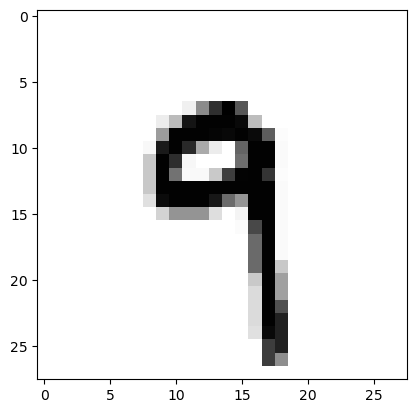

In [18]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad():  # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    # X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    X_test = mnist_test.test_data.float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    #torch.utils.data.random_split
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print("Accuracy:", accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    # X_single_data = mnist_test.test_data[r : r + 1].view(-1, 28 * 28).float().to(device)
    X_single_data = mnist_test.test_data[r : r + 1].float().to(device)
    Y_single_data = mnist_test.test_labels[r : r + 1].to(device)

    print("Label: ", Y_single_data.item())
    single_prediction = model(X_single_data)
    print("Prediction: ", torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r : r + 1].view(28, 28), cmap="Greys", interpolation="nearest")
    plt.show()

# 개선사항

1. 입력 데이터 X의 데이터를 0 ~ 1 사이의 값으로 정규화(normalize)한다. (X / 255) # 여기선 정규화가 되어있는 상태로 데이터가 들어왔다. 
2. Validation 데이터 셋을 분리하고 검증과정을 추가한다.
3. 정확도(Accuracy)와 손실함수(Loss)를 플로팅한다.
4. 학습률과 배치 사이즈, 에포크를 변경해 본다.

# 추가 고려사항
1. 다른 activation 함수를 사용해 본다. (sigmoid(0.9106), tanh, relu(0.9736), leaky relu, elu, selu, swish)
2. 가중치 초기화 방법을 변경해 본다. (uniform, normal, xavier, he)
3. 다른 optimizer를 사용해 본다. (SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam, AMSGrad)
4. Dropout, Batch Normalization 등을 사용해 본다.